In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat

from math import sqrt

import numpy as np
from numpy import concatenate

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
    ax.plot(timeseries,linewidth=2)
    ax.plot(rolmean,linewidth=2, color='r')
    ax.plot(rolstd,linewidth=2, color='k')
    fig.suptitle('Rolling Mean & Standard Deviation',fontsize=20)
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
# data = pd.read_csv('D:/GDP_Lab/StoreItemDemanForecasting/Course/TimeSeriesForecastingUdacity/single-family-home-sales-dataset.csv')
data = pd.read_csv('D:/GDP_Lab/StoreItemDemanForecasting/Data/AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('D:/GDP_Lab/StoreItemDemanForecasting/Course/TimeSeriesForecastingUdacity/single-family-home-sales-dataset.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data = pd.read_csv('D:/GDP_Lab/StoreItemDemanForecasting/Data/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
# ts = data['HomeSales']
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

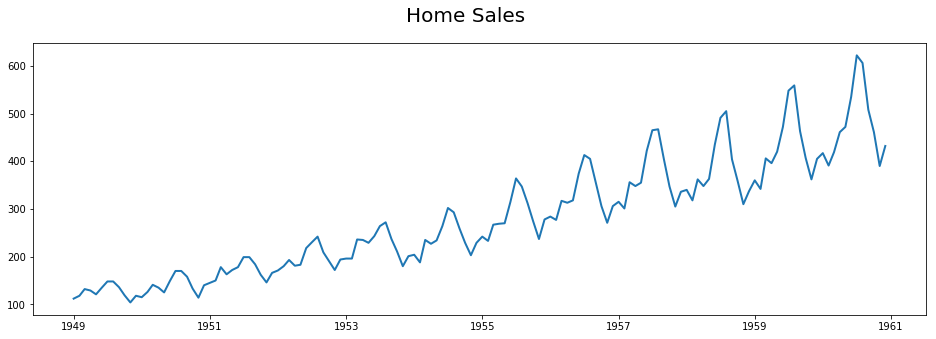

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts,linewidth=2)
fig.suptitle('Home Sales',fontsize=20)
plt.show()

In [7]:
ts_log = np.log(ts)
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
# ax.plot(ts_log,linewidth=2)
# fig.suptitle('Log Home Sales',fontsize=20)
# plt.show()

# Remove trend

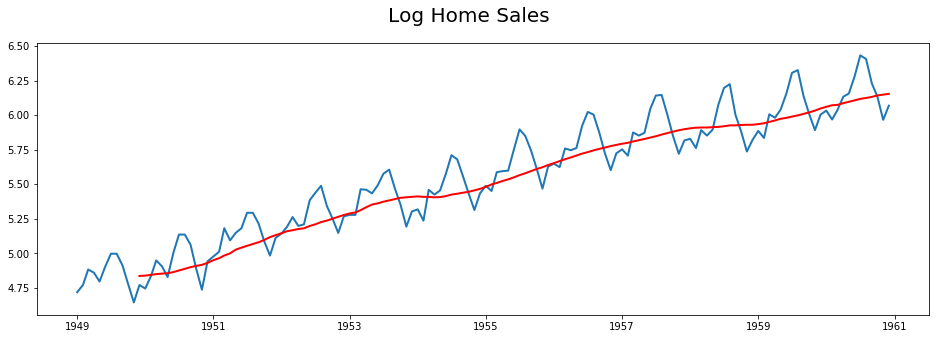

In [8]:
moving_avg = ts_log.rolling(12).mean()
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log,linewidth=2)
ax.plot(moving_avg,linewidth=2, color='r')
fig.suptitle('Log Home Sales',fontsize=20)
plt.show()

In [9]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

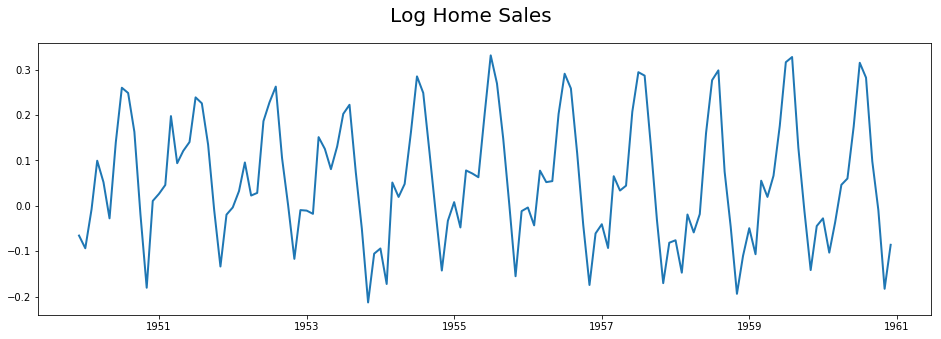

In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log_moving_avg_diff,linewidth=2)
fig.suptitle('Log Home Sales',fontsize=20)
plt.show()

# Differencing

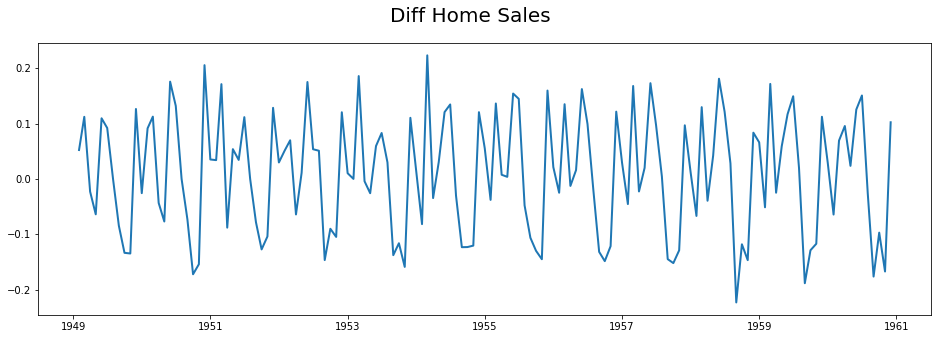

In [12]:
ts_log_diff = ts_log - ts_log.shift()
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log_diff,linewidth=2)
fig.suptitle('Diff Home Sales',fontsize=20)
plt.show()

In [13]:
ts_log_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)

# Decompose

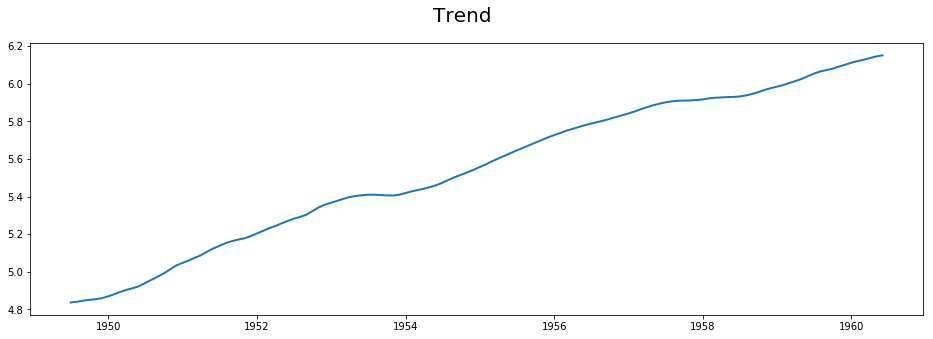

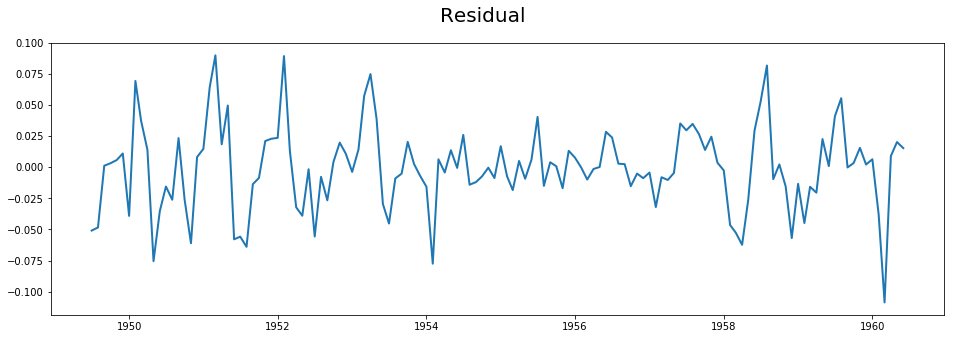

In [14]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(trend,linewidth=2)
fig.suptitle('Trend',fontsize=20)
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(seasonal,linewidth=2)
fig.suptitle('Seasonal',fontsize=20)
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(residual,linewidth=2)
fig.suptitle('Residual',fontsize=20)
plt.show()

In [15]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
# test_stationarity(ts_log_decompose)

## AR

C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


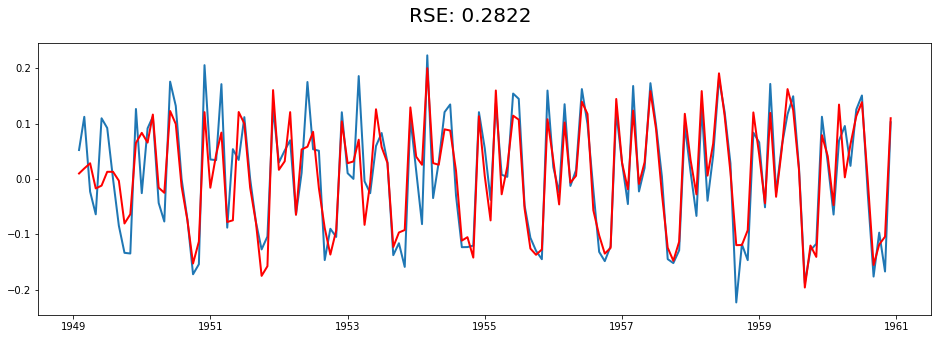

In [62]:
model = ARIMA(ts_log, order=(12, 1, 0))  
results_AR = model.fit(disp=-1)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log_diff,linewidth=2)
ax.plot(results_AR.fittedvalues,linewidth=2, color='red')
fig.suptitle('RSE: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2),fontsize=20)
plt.show()

## MA

In [67]:
model = ARIMA(ts_log, order=(0, 1, 5))
results_MA = model.fit(disp=-1)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log_diff,linewidth=2)
ax.plot(results_MA.fittedvalues,linewidth=2, color='red')
fig.suptitle('RSE: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2),fontsize=20)
plt.show()

C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## ARIMA

In [72]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts_log_diff,linewidth=2)
ax.plot(results_ARIMA.fittedvalues,linewidth=2, color='red')
fig.suptitle('RSE: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2),fontsize=20)
plt.show()

C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\reza\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [73]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009771
1949-03-01    0.018904
1949-04-01    0.028223
1949-05-01   -0.017241
1949-06-01   -0.012136
dtype: float64


In [74]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009771
1949-03-01    0.028675
1949-04-01    0.056898
1949-05-01    0.039657
1949-06-01    0.027521
dtype: float64


In [75]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728270
1949-03-01    4.747174
1949-04-01    4.775397
1949-05-01    4.758156
dtype: float64

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(ts,linewidth=2)
ax.plot(predictions_ARIMA,linewidth=2, color='red')
fig.suptitle('RMSE: %.4f'% sqrt(mean_squared_error(ts, predictions_ARIMA)),fontsize=20)
plt.show()